In [ ]:
## Para obtener los datasets, dependiendo de si se ejecuta en Google Colab o en local, tendremos una localizacion distinta

isOnline = True # True para collab, False para local

In [ ]:
if(isOnline):
  !git clone https://github.com/NIU1596830/Hackathon-Caronte-Challenge-UAB-2024

fatal: destination path 'Hackathon-Caronte-Challenge-UAB-2024' already exists and is not an empty directory.


### 1. Carga de Datos y Exploración Inicial

- Importa las librerías necesarias para el análisis de datos.
- Carga todos los datasets desde la carpeta datasets/.
- Muestra las primeras filas de cada dataset para una exploración inicial.

In [ ]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configuración opcional para visualizar todas las columnas
pd.set_option('display.max_columns', None)

# Definir la ruta a la carpeta de datasets
if(isOnline):
  !ls
  data_path = '/content/Hackathon-Caronte-Challenge-UAB-2024/datasets/'
else:
  data_path = '../datasets/'
# Cargar los datasets crudos
activitats = pd.read_csv(data_path + 'activitats.csv', encoding='latin-1', sep=',')
notes = pd.read_csv(data_path + 'notes.csv', encoding='UTF-8', sep=';')
trameses = pd.read_csv(data_path + 'trameses.csv', encoding='latin-1', sep=',')

# Visualizar las primeras filas de cada dataset
print("activitats:")
display(activitats.head())

print("notes:")
display(notes.head())

print("trameses:")
display(trameses.head())


Hackathon-Caronte-Challenge-UAB-2024  sample_data
activitats:


,activitat_id,activitat,aula_id,startdate,duedate,grade
0,3,Problema 1.1 - Hello world!!!,87,0,0,100
1,4,Problema 1.2 - Hello world!!! ++,87,0,0,100
2,5,Problema 3a.1: Càlcul edat,87,0,0,100
3,6,Problema 3a.8: Conversió dòlars a euros,87,0,0,100
4,7,Problema 3a.11: Mitjana de notes,87,0,0,100


notes:


,userid,aula_id,P_Grade,P_Grade_Date,F_Grade,F_Grade_Date,R_Grade,R_Grade_Date
0,176,92,NaN,NaN,"9,25",1667829600,NaN,1675173600
1,179,92,NaN,NaN,"7,75",1667829600,NaN,1675173600
2,168,92,NaN,NaN,"7,75",1667829600,NaN,1675173600
3,401,92,NaN,NaN,"3,50",1667829600,"8,25",1675173600
4,482,92,NaN,NaN,"7,00",1667829600,NaN,1675173600


trameses:


,id,activitat_id,userid,datesubmitted,grader,dategraded,grade,nevaluations
0,6,3,31,1658829978,0.0,1.658830e+09,100.0,1
1,7,362,26,1658837049,0.0,1.658837e+09,100.0,0
2,9,362,26,1658837075,0.0,1.658837e+09,100.0,0
3,15,362,31,1662537577,0.0,1.662538e+09,NaN,0
4,16,362,31,1662537593,0.0,1.662712e+09,100.0,0


### 2. Exploración de Datos y Estadísticas Básicas

Que informació tenim a cada dataset?

- activitats.csv:
  - activitat_id: Numero únic d'identificació de l'activitat
  - activitat: Nom de l'activitat
  - aula_id: Assignatura a la que pertany
  - startdate: Data de començament (0 si no hi ha)
  - duedate: Data de entrega (0 si no hi ha)
  - grade: Nota màxima

- notes.csv:
  - userId: ID de l'alumne
  - aulaID: ID Assignatura
  - P_Grade: Nota parcial
  - P_Grade_Date: Data de l'exàmen parcial
  - F_Grade: Nota Final
  - F_Grade_Date: Data de l'exàmen final
  - R_Grade: Nota recuperació
  - R_Grade_Date: Data exàmen recuperació

- trameses.csv:
  - id: ID de la tramesa
  - activitat_id: ID de l'activitat entregada
  - userid: ID de l'alumne
  - datesubmitted: Data de l'entrega
  - grader: Persona correctora
  - dategraded: Data on s'ha corregit
  - grade: Nota final
  - nealuations: Intents fins a aconseguir la nota de la tramessa.

In [ ]:
# Verificar las columnas disponibles
print("Columnas en activitats:")
print(activitats.columns.tolist())
print("\nColumnas en notes:")
print(notes.columns.tolist())
print("\nColumnas en trameses:")
print(trameses.columns.tolist())

# Exploración de los grupos
print("Información del dataset 'activitats':")
activitats.info()
display(activitats.describe())
print("\nDescripción estadística de 'notes':")
notes.info()
display(notes.describe())
print("\nDescripción estadística de 'trameses':")
trameses.info()
display(trameses.describe())


Columnas en activitats:
['activitat_id', 'activitat', 'aula_id', 'startdate', 'duedate', 'grade']

Columnas en notes:
['userid', 'aula_id', 'P_Grade', 'P_Grade_Date', 'F_Grade', 'F_Grade_Date', 'R_Grade', 'R_Grade_Date']

Columnas en trameses:
['id', 'activitat_id', 'userid', 'datesubmitted', 'grader', 'dategraded', 'grade', 'nevaluations']
Información del dataset 'activitats':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   activitat_id  1801 non-null   int64 
 1   activitat     1801 non-null   object
 2   aula_id       1801 non-null   int64 
 3   startdate     1801 non-null   int64 
 4   duedate       1801 non-null   int64 
 5   grade         1801 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 84.5+ KB


,activitat_id,aula_id,startdate,duedate,grade
count,1801.000000,1801.000000,1.801000e+03,1.801000e+03,1801.000000
mean,2253.192671,135.719600,2.871034e+08,4.691037e+08,95.976124
std,1228.041189,31.672328,6.325940e+08,7.509569e+08,19.451792
min,3.000000,87.000000,0.000000e+00,0.000000e+00,1.000000
25%,1520.000000,114.000000,0.000000e+00,0.000000e+00,100.000000
50%,2412.000000,141.000000,0.000000e+00,0.000000e+00,100.000000
75%,3389.000000,164.000000,0.000000e+00,1.612825e+09,100.000000
max,4388.000000,184.000000,1.729586e+09,1.730847e+09,100.000000



Descripción estadística de 'notes':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088 entries, 0 to 1087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   userid        1088 non-null   int64  
 1   aula_id       1088 non-null   int64  
 2   P_Grade       221 non-null    object 
 3   P_Grade_Date  350 non-null    float64
 4   F_Grade       707 non-null    object 
 5   F_Grade_Date  1088 non-null   int64  
 6   R_Grade       250 non-null    object 
 7   R_Grade_Date  1088 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 68.1+ KB


,userid,aula_id,P_Grade_Date,F_Grade_Date,R_Grade_Date
count,1088.000000,1088.000000,3.500000e+02,1.088000e+03,1.088000e+03
mean,1630.977022,137.447610,1.700337e+09,1.701905e+09,1.706797e+09
std,894.192414,36.570948,2.623244e+07,2.642382e+07,2.591845e+07
min,21.000000,87.000000,1.666876e+09,1.667830e+09,1.674742e+09
25%,793.750000,92.000000,1.667830e+09,1.673964e+09,1.675174e+09
50%,1839.500000,143.000000,1.698934e+09,1.699884e+09,1.706191e+09
75%,2534.250000,176.000000,1.730988e+09,1.731938e+09,1.738073e+09
max,3008.000000,184.000000,1.730988e+09,1.736950e+09,1.738073e+09



Descripción estadística de 'trameses':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547962 entries, 0 to 547961
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             547962 non-null  int64  
 1   activitat_id   547962 non-null  int64  
 2   userid         547962 non-null  int64  
 3   datesubmitted  547962 non-null  int64  
 4   grader         547955 non-null  float64
 5   dategraded     547955 non-null  float64
 6   grade          294615 non-null  float64
 7   nevaluations   547962 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 33.4 MB


,id,activitat_id,userid,datesubmitted,grader,dategraded,grade,nevaluations
count,5.479620e+05,547962.000000,547962.000000,5.479620e+05,547955.000000,5.479550e+05,294615.000000,547962.000000
mean,5.710884e+05,2067.368347,1535.529867,1.693862e+09,0.008311,1.038656e+09,40.951649,5.104122
std,3.710775e+05,1309.297003,851.721179,2.277150e+07,2.217133,8.250547e+08,46.876768,11.602975
min,6.000000e+00,3.000000,21.000000,1.658830e+09,0.000000,0.000000e+00,0.000000,0.000000
25%,2.148615e+05,451.000000,721.000000,1.667383e+09,0.000000,0.000000e+00,0.000000,1.000000
50%,5.696875e+05,2617.000000,1821.000000,1.697035e+09,0.000000,1.666213e+09,0.000000,2.000000
75%,8.190992e+05,3103.000000,2140.000000,1.704223e+09,0.000000,1.697717e+09,100.000000,5.000000
max,1.235649e+06,4386.000000,3008.000000,1.729606e+09,1613.000000,1.729606e+09,100.000000,417.000000


# Eliminar columnas innecesarias

Columnas que no nos aportan informacion en los datasets:

- activitats.csv:
  - "activitat": Nom de l'activitat

- notes.csv:
  - "P_Grade_Date": Data de la prova parcial
  - "F_Grade_Date": Data de la prova final
  - "R_Grade_Date": Data de la prova de recuperació

Abans de borrar les dates, les utilitzarem per a diferenciar les assignatures que tenen parcial, i les afegirem en una nova columna 'avalContinua'. Després eliminarem tots els null a F_Grade, ja que no considerem útils per a la nostra investigació les persones que no han arribat a fer l'examen final.

- trameses.csv:
  - "grader": Persona que corregeix (normalment '0' -> automàtic)
  - "datesubmitted": Data de l'entrega, l'eliminem ja que ho canviarem per duració de la entrega

In [ ]:
## DATASET ACTIVITAT
# QUITAMOS COLUMNA ACTIVITAT
activitats_clean = activitats.drop(labels=["activitat"], axis=1)

In [ ]:
## DATASET NOTES
# CREAR COLUMNA AVALCONTINUA A PARTIR DE LOS NULL EN P_GRADE_DATE PARA SABER SI SON DE AVALUACIÓN CONTINUA O ÚNICA
notes["avalContinua"] = notes['P_Grade_Date'].notnull()
# BORREM LES DATES DELS EXAMENS I ELS CASOS ON 'F_Grade' SIGUI NULL
notes_clean = notes.drop(labels=["P_Grade_Date"], axis=1)
notes_clean = notes_clean.drop(labels=["F_Grade_Date"], axis=1)
notes_clean = notes_clean.drop(labels=["R_Grade_Date"], axis=1)
notes_clean = notes_clean.dropna(subset=['F_Grade', "R_Grade"], how="all")
notes_clean['P_Grade'] = pd.to_numeric(notes_clean['P_Grade'].replace(',', '.', regex=True), errors='coerce')
notes_clean['F_Grade'] = pd.to_numeric(notes_clean['F_Grade'].replace(',', '.', regex=True), errors='coerce')
notes_clean['R_Grade'] = pd.to_numeric(notes_clean['R_Grade'].replace(',', '.', regex=True), errors='coerce')

# SE PUEDEN APROBAR ASIGNATURAS SOLO PRESENTANDOTE A LA RECUPERACIÓN
recuperacion = notes[notes['F_Grade'].isna() & notes['R_Grade'].notna()]
print("\nAlumnos aprobando solo con recuperaciones:")
print(recuperacion)

print("\nListado de notas:")
print(notes_clean)

filtro = notes[notes['P_Grade'].notna() & notes['P_Grade_Date'].isna()]
print("\nfiltro:")
print(filtro)


Alumnos aprobando solo con recuperaciones:
     userid  aula_id P_Grade  P_Grade_Date F_Grade  F_Grade_Date R_Grade  \
230    1196       92     NaN           NaN     NaN    1667829600       4   
301    1860      143     NaN           NaN     NaN    1699884000     3,8   
313    2146      143     NaN           NaN     NaN    1699884000    1,05   
398    1324      143     NaN           NaN     NaN    1699884000    4,65   
471    2141      143     NaN           NaN     NaN    1699884000    6,85   

     R_Grade_Date  avalContinua  
230    1675173600         False  
301    1706191200         False  
313    1706191200         False  
398    1706191200         False  
471    1706191200         False  

Listado de notas:
     userid  aula_id  P_Grade  F_Grade  R_Grade  avalContinua
0       176       92      NaN     9.25      NaN         False
1       179       92      NaN     7.75      NaN         False
2       168       92      NaN     7.75      NaN         False
3       401       92      Na

In [ ]:
## DATASET TRAMESES
# QUITAMOS COLUMNA GRADER
trameses_clean = trameses.drop(labels=["grader"], axis=1)
trameses_clean["grade"] = trameses_clean["grade"].fillna(0) #CAMBIEM NULLS DE GRADES A 0

# CREEM UNA NOVA COLUMNA, TEMPS TRANSCURRIT ENTRE PRIMERA I ULTIMA ENTREGA
timestamp_min = trameses_clean.groupby(['activitat_id', 'userid'])['datesubmitted'].transform('min')
timestamp_max = trameses_clean.groupby(['activitat_id', 'userid'])['datesubmitted'].transform('max')
trameses_clean['timediff'] = (timestamp_max - timestamp_min)
trameses_clean = trameses_clean.sort_values(by=['grade','datesubmitted'], ascending=[False, True])

trameses_clean = trameses_clean.drop_duplicates(subset=['activitat_id', 'userid'], keep='first') # ELIMINEM FILES DE LA MATEIXA ACTIVITAT I USUARI
trameses_clean = trameses_clean.drop(labels=["datesubmitted"], axis=1)

In [ ]:
print(activitats_clean)
print(notes_clean)
print(trameses_clean)

      activitat_id  aula_id   startdate     duedate  grade
0                3       87           0           0    100
1                4       87           0           0    100
2                5       87           0           0    100
3                6       87           0           0    100
4                7       87           0           0    100
...            ...      ...         ...         ...    ...
1796          4194      184           0           0    100
1797          4379      114           0           0     10
1798          4380      114           0           0     10
1799          4386      176  1571985000  1576745700    100
1800          4388      184  1698917400  1698924900    100

[1801 rows x 5 columns]
     userid  aula_id  P_Grade  F_Grade  R_Grade  avalContinua
0       176       92      NaN     9.25      NaN         False
1       179       92      NaN     7.75      NaN         False
2       168       92      NaN     7.75      NaN         False
3       401       9

# Data improvement

Añadimos información que nos ayudará a analizar los datos y la predicción de la nota final.

- 'actTotal': Percentatge d'activitats enviades de l'assignatura

In [ ]:
activitats_clean['actTotal'] = activitats_clean.groupby('aula_id')['activitat_id'].transform('nunique')

# JOIN

Fem un inner join de els 3 datasets

In [ ]:
activitats_prev = activitats_clean.rename({"grade": "grade_max"}, axis=1)
joined1 = pd.merge(trameses_clean, activitats_prev, on="activitat_id")
joined2 = pd.merge(joined1, notes_clean, on=["userid", "aula_id"])

joined2["grade"] = joined2["grade"] / joined2["grade_max"]
joined2_cleaned = joined2.drop(labels=["grade_max"], axis=1)
joined2_cleaned.sort_values(by="aula_id", ascending=True).describe()

,id,activitat_id,userid,dategraded,grade,nevaluations,timediff,aula_id,startdate,duedate,actTotal,P_Grade,F_Grade,R_Grade
count,7.663100e+04,76631.000000,76631.000000,7.663100e+04,76631.000000,76631.000000,7.663100e+04,76631.000000,7.663100e+04,7.663100e+04,76631.000000,27564.000000,76391.000000,25662.000000
mean,3.897031e+05,1542.781355,1216.525832,1.616912e+09,0.911004,3.507680,1.977146e+05,117.859130,1.413394e+08,1.531317e+08,189.151479,5.506010,5.399797,5.015847
std,2.654578e+05,1186.294978,708.402750,3.350729e+08,0.272052,6.022732,1.252163e+06,26.045417,4.688624e+08,4.862382e+08,42.102089,2.769429,2.684190,2.174036
min,2.200000e+01,3.000000,21.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,87.000000,0.000000e+00,0.000000e+00,145.000000,0.000000,0.000000,0.000000
25%,1.404860e+05,391.000000,466.000000,1.667211e+09,1.000000,1.000000,0.000000e+00,92.000000,0.000000e+00,0.000000e+00,145.000000,3.250000,3.500000,3.450000
50%,4.375000e+05,2395.000000,1259.000000,1.694676e+09,1.000000,2.000000,1.810000e+02,141.000000,0.000000e+00,0.000000e+00,175.000000,5.880000,5.750000,5.100000
75%,6.218260e+05,2629.000000,1874.000000,1.697460e+09,1.000000,4.000000,1.328000e+03,143.000000,0.000000e+00,0.000000e+00,213.000000,7.950000,7.650000,6.700000
max,1.007799e+06,3321.000000,2273.000000,1.722694e+09,1.000000,344.000000,2.970130e+07,143.000000,1.707206e+09,1.707214e+09,262.000000,10.000000,10.500000,9.150000


Creamos un contador para cada pareja de alumno y asignatura, con la cantidad de actividades que ha enviado el alumno. Después normalizamos el valor dividiendolo por la cantidad de actividades disponibles de la asignatura.

In [ ]:
joined2_cleaned['actCount'] = joined2_cleaned.groupby(['aula_id', 'userid'])['activitat_id'].transform('nunique')
joined2_cleaned

,id,activitat_id,userid,dategraded,grade,nevaluations,timediff,aula_id,startdate,duedate,actTotal,P_Grade,F_Grade,R_Grade,avalContinua,actCount
0,22,362,173,1.662991e+09,1.0,1,0,92,0,0,145,NaN,8.50,NaN,False,119
1,24,362,65,1.662974e+09,1.0,1,0,92,0,0,145,NaN,7.25,NaN,False,80
2,26,363,65,1.662974e+09,1.0,2,30,92,0,0,145,NaN,7.25,NaN,False,80
3,31,3,279,1.662990e+09,1.0,1,34,87,0,0,213,8.0,7.25,NaN,True,121
4,33,362,144,1.662990e+09,1.0,2,16,92,0,0,145,NaN,6.00,NaN,False,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76626,889711,2659,2140,0.000000e+00,0.0,0,80,143,0,0,175,NaN,6.05,NaN,False,130
76627,917753,2605,2007,0.000000e+00,0.0,0,2052,143,0,0,175,NaN,5.00,NaN,False,112
76628,954100,2646,2140,0.000000e+00,0.0,0,83,143,0,0,175,NaN,6.05,NaN,False,130
76629,967241,2670,2140,0.000000e+00,0.0,0,100726,143,0,0,175,NaN,6.05,NaN,False,130


In [ ]:
joined2_cleaned['actPercentage'] = joined2_cleaned['actCount'] / joined2_cleaned['actTotal']
joined2_cleaned

,id,activitat_id,userid,dategraded,grade,nevaluations,timediff,aula_id,startdate,duedate,actTotal,P_Grade,F_Grade,R_Grade,avalContinua,actCount,actPercentage
0,22,362,173,1.662991e+09,1.0,1,0,92,0,0,145,NaN,8.50,NaN,False,119,0.820690
1,24,362,65,1.662974e+09,1.0,1,0,92,0,0,145,NaN,7.25,NaN,False,80,0.551724
2,26,363,65,1.662974e+09,1.0,2,30,92,0,0,145,NaN,7.25,NaN,False,80,0.551724
3,31,3,279,1.662990e+09,1.0,1,34,87,0,0,213,8.0,7.25,NaN,True,121,0.568075
4,33,362,144,1.662990e+09,1.0,2,16,92,0,0,145,NaN,6.00,NaN,False,94,0.648276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76626,889711,2659,2140,0.000000e+00,0.0,0,80,143,0,0,175,NaN,6.05,NaN,False,130,0.742857
76627,917753,2605,2007,0.000000e+00,0.0,0,2052,143,0,0,175,NaN,5.00,NaN,False,112,0.640000
76628,954100,2646,2140,0.000000e+00,0.0,0,83,143,0,0,175,NaN,6.05,NaN,False,130,0.742857
76629,967241,2670,2140,0.000000e+00,0.0,0,100726,143,0,0,175,NaN,6.05,NaN,False,130,0.742857


In [ ]:
joined2_cleaned["grades_mean"] = joined2_cleaned.groupby(['aula_id', 'userid'])['grade'].transform('mean')
joined2_cleaned

,id,activitat_id,userid,dategraded,grade,nevaluations,timediff,aula_id,startdate,duedate,actTotal,P_Grade,F_Grade,R_Grade,avalContinua,actCount,actPercentage,grades_mean
0,22,362,173,1.662991e+09,1.0,1,0,92,0,0,145,NaN,8.50,NaN,False,119,0.820690,0.899916
1,24,362,65,1.662974e+09,1.0,1,0,92,0,0,145,NaN,7.25,NaN,False,80,0.551724,0.857425
2,26,363,65,1.662974e+09,1.0,2,30,92,0,0,145,NaN,7.25,NaN,False,80,0.551724,0.857425
3,31,3,279,1.662990e+09,1.0,1,34,87,0,0,213,8.0,7.25,NaN,True,121,0.568075,1.000000
4,33,362,144,1.662990e+09,1.0,2,16,92,0,0,145,NaN,6.00,NaN,False,94,0.648276,0.827872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76626,889711,2659,2140,0.000000e+00,0.0,0,80,143,0,0,175,NaN,6.05,NaN,False,130,0.742857,0.908077
76627,917753,2605,2007,0.000000e+00,0.0,0,2052,143,0,0,175,NaN,5.00,NaN,False,112,0.640000,0.846786
76628,954100,2646,2140,0.000000e+00,0.0,0,83,143,0,0,175,NaN,6.05,NaN,False,130,0.742857,0.908077
76629,967241,2670,2140,0.000000e+00,0.0,0,100726,143,0,0,175,NaN,6.05,NaN,False,130,0.742857,0.908077


In [ ]:
joined2_cleaned["passed"] = (joined2_cleaned["F_Grade"] >= 5) | (joined2_cleaned["R_Grade"] >= 5)

Number of R_Grade >= 5: 144
Number of R_Grade < 5: 106


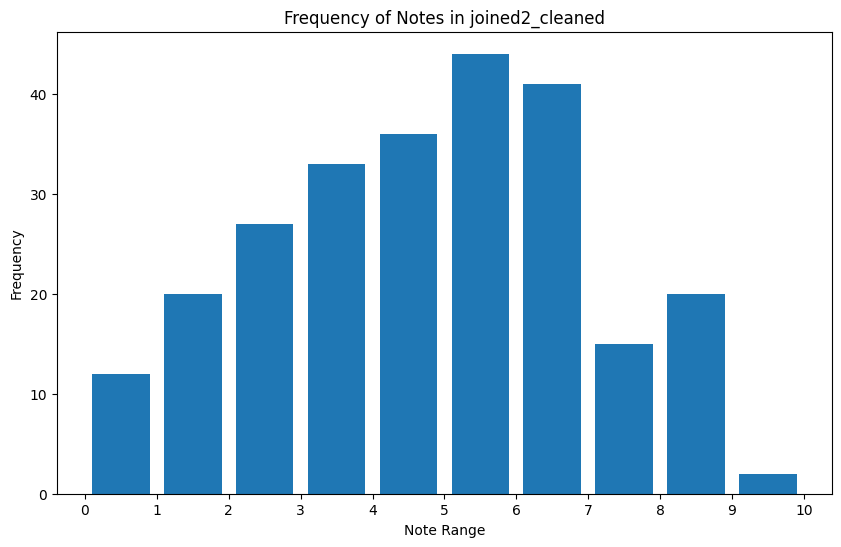

In [ ]:
# prompt: create me a graph for the table joined2_cleaned where it shows the frequency of the notes from 0 to 10 in a range of 1

# Assuming joined2_cleaned is your DataFrame
note_counts = joined2_cleaned.drop_duplicates(subset=['aula_id', 'userid'], keep='first')
plot_counts = note_counts['R_Grade'].value_counts(bins=range(0, 11))

r_grade_greater_equal_5 = len(note_counts[note_counts['R_Grade'] >= 5])
r_grade_less_5 = len(note_counts[note_counts['R_Grade'] < 5])

print(f"Number of R_Grade >= 5: {r_grade_greater_equal_5}")
print(f"Number of R_Grade < 5: {r_grade_less_5}")

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(plot_counts.index.mid, plot_counts.values)
plt.xlabel("Note Range")
plt.ylabel("Frequency")
plt.title("Frequency of Notes in joined2_cleaned")
plt.xticks(range(0, 11))  # Set x-axis ticks to integers from 0 to 10
plt.show()

In [ ]:
aux2 = joined2_cleaned.drop_duplicates(subset=['aula_id', 'userid'], keep='first')
aux = aux2.groupby('aula_id').agg(
    mean_nota=('F_Grade', 'mean'),
    median_nota_final=('F_Grade', 'median'),
    median_nota_recu = ('R_Grade', 'median'),
    min_nota=('F_Grade', 'min'),
    max_nota=('F_Grade', 'max'),
    std_nota=('F_Grade', 'std'),
    mean_passed=('passed', 'mean'),
    count_estudiantes_unicos=('userid', 'nunique')  # Contar estudiantes únicos
).reset_index()
aux

,aula_id,mean_nota,median_nota_final,median_nota_recu,min_nota,max_nota,std_nota,mean_passed,count_estudiantes_unicos
0,87,5.245495,5.50,5.000,0.0,10.50,2.828825,0.837838,111
1,92,4.927291,5.25,5.125,0.0,9.75,2.639307,0.769841,252
2,141,4.735182,5.05,5.105,0.0,9.90,3.280606,0.781818,110
3,143,5.286739,5.35,5.015,0.0,9.89,2.583767,0.794872,234


### Recursos Adicionales
Documentación de Librerías:

- Pandas Documentation: https://pandas.pydata.org/
- Matplotlib Documentation: https://matplotlib.org/
- PuLP Documentation: https://coin-or.github.io/pulp/
- Pyomo Documentation: https://www.pyomo.org/

Tutoriales Útiles:

- Introduction to Linear Programming in Python (ROOKIES): https://github.com/benalexkeen/Introduction-to-linear-programming
- Análsiis de Datos con Python (ROOKIES): https://www.youtube.com/watch?v=TcdKDmtKeRY
- Data Cleaning with Pandas: https://www.w3schools.com/python/pandas/default.asp
- Hands-On Linear Programming: Optimization With Python: https://realpython.com/linear-programming-python/

NOTAS:

- Los ejemplos proporcionados son básicos y pueden requerir ajustes según la estructura específica de los datos.
- Adapta el código a tus necesidades y profundiza en las áreas que consideres relevantes.
- Te recomiendo que documentes el proceso, decisiones y hallazgos.
- La claridad en la presentación de resultados y metodología será valorada.